# Chapter 1: Using neural nets to recognize handwritten digits

## Perceptrons

## Sigmoid neurons

### Exercise 1 ([link](http://neuralnetworksanddeeplearning.com/chap1.html#exercises_191892)): sigmoid neurons simulating perceptrons, part I

Let's show that the behavior of a single perceptron doesn't change if we multiply its weight vector and its bias by a constant $c > 0$. The output of this perceptron is:

\begin{eqnarray}
  \mbox{output} = \left\{ 
    \begin{array}{ll} 
      0 & \mbox{if } cw\cdot x + cb \leq 0 \\
      1 & \mbox{if } cw\cdot x + cb > 0
    \end{array}
  \right.
\end{eqnarray}

Which is the same as the output without the multiplication by $c$:

\begin{eqnarray}
  \mbox{output} = \left\{ 
    \begin{array}{ll} 
      0 & \mbox{if } w\cdot x + b \leq 0 \\
      1 & \mbox{if } w\cdot x + b > 0
    \end{array}
  \right.
\end{eqnarray}

Since this is true for every perceptron, the behavior of our neural network as a whole doesn't change either.

### Exercice 2: sigmoid neurons simulating perceptrons, part II

For a given sigmoid neuron with weight and bias multiplied by $c$, the activation function is $\sigma(cw.x+cb) = \frac{1}{1 + e^{-(cw.x+cb)}}$.

For each perceptron, it is supposed that $w.x+b \neq 0$.
* If $w.x+b > 0$, then as $c \rightarrow \infty$, $\frac{1}{1 + e^{-(cw.x+cb)}} \rightarrow \frac{1}{1 + 0} = 1$.
* If $w.x+b < 0$, then as $c \rightarrow \infty$, $\frac{1}{1 + e^{-(cw.x+cb)}} \rightarrow \frac{1}{1 + \infty} = 0$.

Therefore our sigmoid neuron gives the same output as a perceptron of parameters $(w,b)$ in the limit as $c \rightarrow \infty$.

Since this is true for every neuron, our network as a whole has the same behavior as a network of perceptrons as $c \rightarrow \infty$.

If however we have $w.x+b = 0$ for at least one sigmoid neuron, then its output is going to be $\sigma(0) = \frac{1}{1+e^0} = \frac{1}{2}$ whatever the value of $c$. So we will never have the behavior of a perceptron, which only ever outputs 0 or 1.

## The architecture of neural networks

## A simple network to classify handwritten digits

### Exercise 3 ([link](http://neuralnetworksanddeeplearning.com/chap1.html#exercise_513527)): converting the output layer into a bitwise representation with an extra layer

Here's what our extra 4-neuron layer should do:
* (digit = 0) (1, 0, 0, 0, 0, 0, 0, 0, 0, 0) -> (0, 0, 0, 0)
* (digit = 1) (0, 1, 0, 0, 0, 0, 0, 0, 0, 0) -> (0, 0, 0, 1)
* (digit = 2) (0, 0, 1, 0, 0, 0, 0, 0, 0, 0) -> (0, 0, 1, 0)
* (digit = 3) (0, 0, 0, 1, 0, 0, 0, 0, 0, 0) -> (0, 0, 1, 1)
* (digit = 4) (0, 0, 0, 0, 1, 0, 0, 0, 0, 0) -> (0, 1, 0, 0)
* (digit = 5) (0, 0, 0, 0, 0, 1, 0, 0, 0, 0) -> (0, 1, 0, 1)
* (digit = 6) (0, 0, 0, 0, 0, 0, 1, 0, 0, 0) -> (0, 1, 1, 0)
* (digit = 7) (0, 0, 0, 0, 0, 0, 0, 1, 0, 0) -> (0, 1, 1, 1)
* (digit = 8) (0, 0, 0, 0, 0, 0, 0, 0, 1, 0) -> (1, 0, 0, 0)
* (digit = 9) (0, 0, 0, 0, 0, 0, 0, 0, 0, 1) -> (1, 0, 0, 1)

Our first neuron must output roughly 1 for 8 and 9, and roughly 0 otherwise. The following weight vector will make 8 and 9 the only contributors to its weighted input: (0, 0, 0, 0, 0, 0, 0, 0, 1, 1). With this vector, the weighted input $w.x$ is roughly 1 for digits 8 and 9, and roughly 0 for other digits. More precisely, since the correct output in the old output layer is at least 0.99 and incorrect outputs are smaller than 0.01, $0.99 \leq w.x \leq 1.01$ for 8 and 9, and $0 \leq w.x \leq 0.02$ for other digits.

Now which bias would be appropriate? Let's say we want the same precision as in the old output layer: $0.99 \leq \sigma(w.x+b)$ for 8 and 9, and $\sigma(w.x+b) \leq 0.01$ for other digits.

Or to speak roughly, we look for $b$ satisfying $\sigma(b) \approx 0$ and $\sigma(1+b) \approx 1$.

If we set $b = -0.5$, we're almost there since $\sigma(b) < 0.5$ and $\sigma(1+b) > 0.5$. We only have to make the slope much steeper, by multiplying all this by a large constant (meaning a larger weight vector).

How large is enough? Remember our desired precision. We are looking for $\tilde{w}$ such that $0.99 \leq \sigma(\tilde{w}(0.99+b))$ and $\sigma(\tilde{w}(0.02+b)) \leq 0.01$.

At this point let's note $\alpha$ our desired precision: here, $\alpha = 0.01$.

So we want:

\begin{eqnarray}
  \left\{ 
    \begin{array}{ll} 
      1-\alpha \leq \sigma(\tilde{w}(1-\alpha+b)) \\
      \sigma(\tilde{w}(2\alpha+b)) \leq \alpha
    \end{array}
  \right.
\end{eqnarray}

Which gives us:

\begin{eqnarray}
  \left\{ 
    \begin{array}{ll} 
      \tilde{w} \geq \frac{ln(\frac{1-\alpha}{\alpha})}{1-\alpha+b} \\
      \tilde{w} \geq -\frac{ln(\frac{1-\alpha}{\alpha})}{2\alpha+b}
    \end{array}
  \right.
\end{eqnarray}

\begin{eqnarray}
  \left\{ 
    \begin{array}{ll} 
      \tilde{w} \geq 9.38 \\
      \tilde{w} \geq 9.58
    \end{array}
  \right.
\end{eqnarray}

Before concluding for this neuron, let's generalize to the other ones, because I'd like all the weights and biases of the last layer to be as close to each other as possible (for simplicity).

So if we have a neuron that should take the output of $n \leq 10$ neurons of the old output layer into account (by using a weight vector with only zeros and ones), we'll necessarily have $1-\alpha \leq w.x \leq 1 + (n-1) \alpha$ when the output is one of those digits, and $0 \leq w.x \leq n\alpha$ for the other digits.

So our conditions become:

\begin{eqnarray}
  \left\{ 
    \begin{array}{ll} 
      1-\alpha \leq \sigma(\tilde{w}(1-\alpha+b)) \\
      \sigma(\tilde{w}(n\alpha+b)) \leq \alpha
    \end{array}
  \right.
\end{eqnarray}

With solution, since $n\alpha < 0.5$ (and so $n\alpha+b < 0$):

\begin{eqnarray}
  \left\{ 
    \begin{array}{ll} 
      \tilde{w} \geq \frac{ln(\frac{1-\alpha}{\alpha})}{1-\alpha+b} \\
      \tilde{w} \geq -\frac{ln(\frac{1-\alpha}{\alpha})}{n\alpha+b}
    \end{array}
  \right.
\end{eqnarray}

Now $n \leq 10$ for each neuron, so we'll be good everywhere with the following:

\begin{eqnarray}
  \left\{ 
    \begin{array}{ll} 
      \tilde{w} \geq 9.38 \\
      \tilde{w} \geq 11.49
    \end{array}
  \right.
\end{eqnarray}

Or let's say $\tilde{w} \geq 12$.

So the final weight vector will be made of zeros and twelves, and the final bias will be -6 everywhere.

Here's our final solution:

* Neuron 1: $w = 12(0, 0, 0, 0, 0, 0, 0, 0, 1, 1)$ ;  $b = -6$
* Neuron 2: $w = 12(0, 0, 0, 0, 1, 1, 1, 1, 0, 0)$ ;  $b = -6$
* Neuron 3: $w = 12(0, 0, 1, 1, 0, 0, 1, 1, 0, 0)$ ;  $b = -6$
* Neuron 4: $w = 12(0, 1, 0, 1, 0, 1, 0, 1, 0, 1)$ ;  $b = -6$

## Learning with gradient descent

### Exercise 4 ([link](http://neuralnetworksanddeeplearning.com/chap1.html#exercises_647181)): prove the local optimality of gradient descent

The Cauchy-Schwartz inequality states that for 2 vectors $u$ and $v$, we have:
* $-\|u\| \|v\| \leq u.v$, and
* $-\|u\| \|v\| = u.v$ if and only if $u$ and $v$ are negatively proportional to each other, i.e. $u = -\alpha v$, $\alpha > 0$.

Here, for all $\Delta v$ of length $\epsilon$, we necessarily have:

$-\epsilon \| \nabla C \| \leq \Delta v . \nabla C$

And there is only one way to have the equality: letting $\Delta v$ be negatively proportional to $\nabla C$ (while keeping the size constraint $\| \Delta v \| = \epsilon$):

$\Delta v = -\frac{\epsilon}{\| \nabla C \|} \nabla C$

Which indeed gives us:

\begin{equation*}
    \begin{aligned}
        \Delta v . \nabla C &= -\frac{\epsilon}{\| \nabla C \|} \nabla C . \nabla C \\
        &= -\frac{\epsilon}{\| \nabla C \|} \| \nabla C \|^2 \\
        &= -\epsilon \| \nabla C \|
    \end{aligned}
\end{equation*}

### Exercise 5: one-dimensional gradient descent

In the one-dimensional case, the gradient of C is just its derivative: $\nabla C (x) = C'(x)$, and $\Delta v(x) = - \epsilon \frac{C'(x)}{C'(x)} = - \epsilon$.

So at every step we're just moving to the new absciss $x+\epsilon$ if $C'(x) < 0$, and $x-\epsilon$ if $C'(x) > 0$.

This is very natural if you have a picture in mind: imagine being on the parabola $y = x^2$. Then we're heading toward the global minimum at every step.

The one-dimensional case is also a good opportunity to show that we're only heading toward a *local* minimum, not necessarily a *global* one:

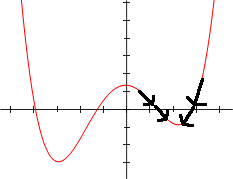

If we start from the valley to the right and $\epsilon$ is small enough, we're never going to reach the global minimum.

### Exercice 6 ([link](http://neuralnetworksanddeeplearning.com/chap1.html#exercise_263792)): online learning

Online learning uses a mini-batch size of only 1. We compare it with a mini-batch size of 20 below.

**Advantage**: learning occurs faster;

**Disadvantage**: the approximation of the gradient may be quite inaccurate, and so the direction of the gradient descent may be imprecise or even completely off with some extreme examples.

This analysis is just the same as a mini-batch size of 20 compared to the whole training set.